In [1]:
import pandas as pd
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [3]:
data.shape

(200, 4)

In [4]:
import seaborn as sns

%matplotlib inline

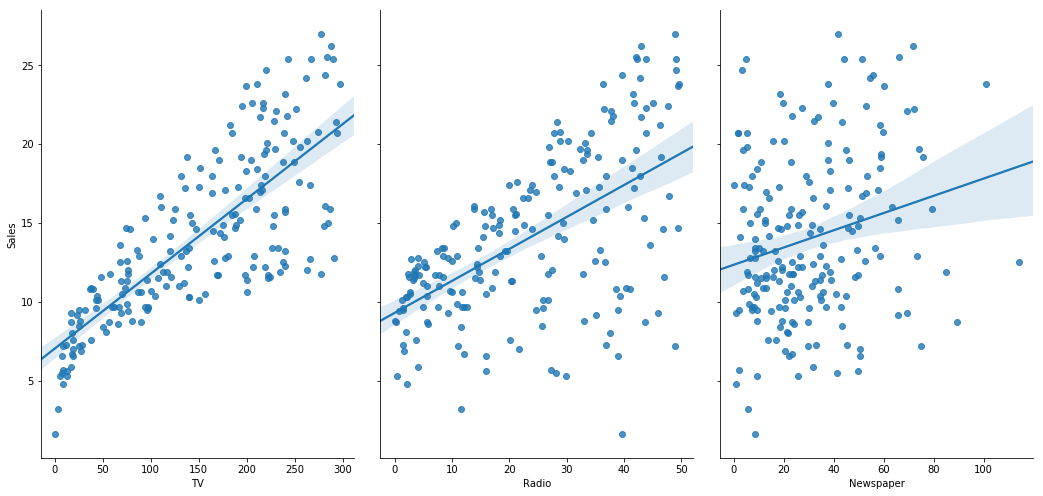

In [5]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect = 0.7, kind ='reg')

In [6]:
feature_cols=['TV','Radio','Newspaper']
X = data[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150,)
(50, 3)
(50,)


In [10]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print linReg.intercept_
print linReg.coef_

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [12]:
zip(feature_cols, linReg.coef_)

[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

In [13]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
print (10+0+20+10)/4.0

import numpy as np

from sklearn import metrics
print metrics.mean_absolute_error(true, pred)
print metrics.mean_squared_error(true, pred)

10.0
10.0
150.0


In [14]:
y_pred = linReg.predict(X_test)

In [15]:
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#if you remove newspaper error will decerease to 1.39

1.40465142303


In [16]:
from sklearn.cross_validation import cross_val_score
lm = LinearRegression()
scores = -cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print np.sqrt(scores).mean()

1.69135317081


In [17]:
feature_cols = ['TV','Radio']
X = data[feature_cols]
scores = -cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print np.sqrt(scores).mean()

1.67967484191
